In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [3]:
df = pd.DataFrame(np.arange(5 * 4).reshape(5,4))

In [4]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [15]:
df_sampled_without_replacement = df.take(np.random.permutation(len(df))[:3])

In [16]:
df_sampled_without_replacement

,0,1,2,3
0,0,1,2,3
4,16,17,18,19
1,4,5,6,7


In [17]:
sampler = np.random.randint(0, len(df), size=3)

In [18]:
sampler

array([4, 2, 0])

In [19]:
df_sampled_with_replacement = df.take(sampler)

In [20]:
df_sampled_with_replacement

,0,1,2,3
4,16,17,18,19
2,8,9,10,11
0,0,1,2,3


In [21]:
df_norm = df / df.sum().astype('float')
df_norm

,0,1,2,3
0,0.0,0.022222,0.04,0.054545
1,0.1,0.111111,0.12,0.127273
2,0.2,0.200000,0.20,0.200000
3,0.3,0.288889,0.28,0.272727
4,0.4,0.377778,0.36,0.345455


In [24]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
array = df.values
X = array[:,0:3]
Y = array[:,3]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-1.414 -1.414 -1.414]
 [-0.707 -0.707 -0.707]
 [ 0.     0.     0.   ]
 [ 0.707  0.707  0.707]
 [ 1.414  1.414  1.414]]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
set_printoptions(precision=3)
print(normalizedX[0:5,:])


[[0.    0.447 0.894]
 [0.456 0.57  0.684]
 [0.511 0.575 0.639]
 [0.532 0.576 0.621]
 [0.543 0.577 0.611]]


In [26]:
perm = np.random.permutation(len(df))
perm

array([2, 0, 3, 1, 4])

In [27]:
df_permutted = df.take(perm)
df_permutted

,0,1,2,3
2,8,9,10,11
0,0,1,2,3
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19


In [28]:
df_permutted_norm = df_permutted / df_permutted.sum().astype('float')

In [29]:
df_permutted_norm

,0,1,2,3
2,0.2,0.200000,0.20,0.200000
0,0.0,0.022222,0.04,0.054545
3,0.3,0.288889,0.28,0.272727
1,0.1,0.111111,0.12,0.127273
4,0.4,0.377778,0.36,0.345455


In [30]:
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)

In [31]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
my_colors = ['g','b','r','c']
pl1 = pd.tools.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), color=my_colors, s=100)

NameError: name 'iris_data' is not defined

In [33]:
iris_data = data.dropna()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


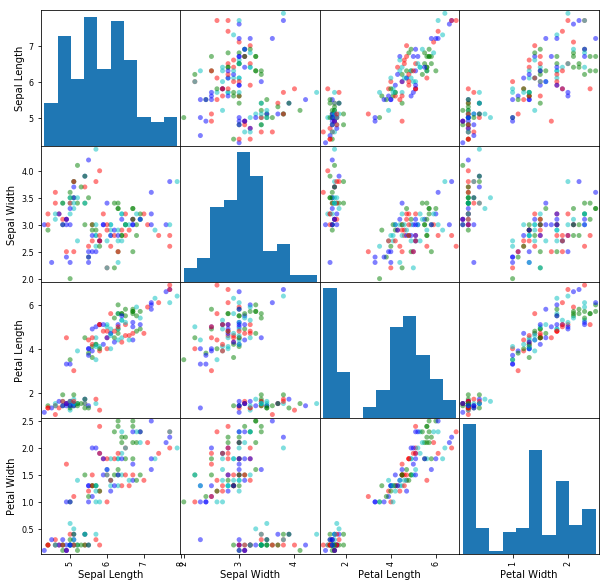

In [39]:
from pandas import scatter_matrix 
my_colors = ['g','b','r','c']
pl1 = pd.tools.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), color=my_colors, s=100)

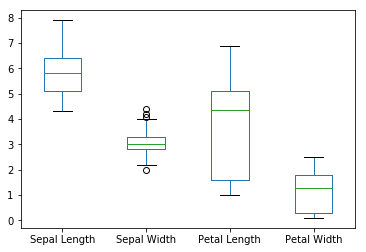

In [40]:
pl2 = iris_data.boxplot(grid=False)

In [41]:
sampler = np.random.randint(0,len(iris_data), size=100)
iris_data = iris_data.take(sampler)
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
121,5.6,2.8,4.9,2.0,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica
69,5.6,2.5,3.9,1.1,Iris-versicolor


In [42]:
iris_data = iris_data.groupby('Name').transform(lambda x: (x-x.mean())/x.std(ddof=1))

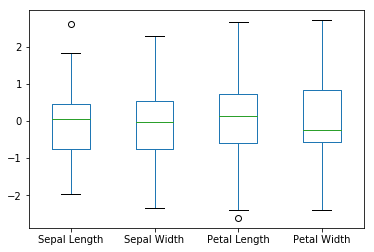

In [43]:
pl4 = iris_data.boxplot(grid=False)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


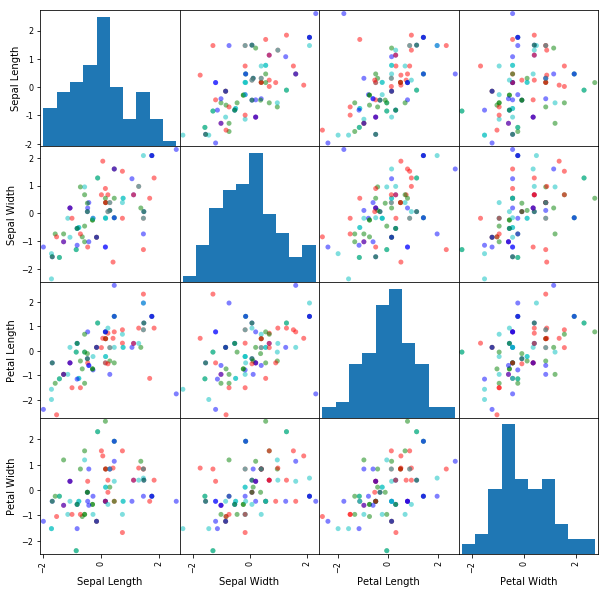

In [44]:
pl5 = pd.tools.plotting.scatter_matrix(iris_data, diagonal='hist', figsize=(10,10), color=my_colors, s=100)